# Proyek Analisis Data: Nama dataset
- Nama: Derie Dariant
- Email: dariant1109@gmail.com
- Id Dicoding: dicoding.com/users/deriedariant/academies

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 :
Bagaimana pertumbuhan penjualan perusahaan dalam periode 5 tahun terakhir?
- pertanyaan 2 :
Produk apa yang memiliki penjualan terbanyak dan terkecil dalam periode 5 tahun terakhir?
- pertanyaan 3 :
Produk apa yang memiliki revenue terbesar dan terkecil dalam periode 5 tahun terakhir?
- pertanyaan 4 :
Produk apa yang memiliki profit terbesar dan terkecil dalam periode 5 tahun terakhir?
- pertanyaan 5 :
Bagaimana hasil analisa penjualan produk dalam periode 5 tahun terakhir menggunakan metode RFM?

## Menyaipkan semua library yang dibuthkan

In [ ]:
#menyiapkan semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#mengestrak data csv ke google colab
orders_df = pd.read_csv('order_items_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')

### Assessing Data

#####Assessing orders_df

In [ ]:
#menampilkan kolom data orders_df
orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#identifikasi missing value pada data orders_df
orders_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

tidak terdapat missing value pada data orders_df

In [ ]:
#Identifikasi duplicate data pada data orders_df
print('Duplikat:',orders_df.duplicated().sum())

Duplikat: 0


tidak terdapat duplicate data pada data orders_df

In [ ]:
#identifikasi jumlah data & tipe data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


- tidak terdapat perbedaan jumlah data dari setiap kolom & terdapat 3 type data (object, int & float) pada data orders_df
- terdapat kesalahan format/type data pada kolom/atribute shipping_limit_date, karena seharusnya menggunakan type 'datetime'

In [ ]:
#identifikasi kolom numerik menggunakan parameter statistik
orders_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


data orders_df memiliki outlier pada nilai max, karena terdapat perbedaan yang sangat jauh dibandingkan nilai-nilai sebelumnya

#####Assessing product_df

In [ ]:
#menampilkan kolom pada data products_df
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#identifikasi missing value pada data products_df
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

data products_df memiliki missing value hampir disemua kolomnya

In [ ]:
#Identifikasi duplicate data pada data products_df
print('Duplikat:',products_df.duplicated().sum())

Duplikat: 0


tidak terdapat duplicate data pada data products_df

In [ ]:
#identifikasi jumlah data & tipe data products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


data products_df tediri dari type data object & float, terdapat perbedaan jumlah data yang cukup signifikan antar kolom, hal ini disebabkan karena terdapat missing value pada data product_df

In [ ]:
#identifikasi kolom numerik menggunakan parameter statistik
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


data products_df memiliki outlier pada nilai max dibeberapa kolom, terlihat perbedaan yang signifikan dibandingkan nilai-nilai sebelumnya

### Cleaning Data

#####Cleaning data orders_df

In [ ]:
#cleaning outlier pada kolom 'order_item_id pada data orders_df dengan mengganti dengan upper limit value
q1 = orders_df['order_item_id'].quantile(0.25)
q3 = orders_df['order_item_id'].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
order_item_id_df = orders_df.copy()
order_item_id_df.loc[order_item_id_df['order_item_id']>upper_limit,'order_item_id'] = upper_limit
order_item_id_df.loc[order_item_id_df['order_item_id']<lower_limit,'order_item_id'] = lower_limit

In [ ]:
#cleaning outlier pada kolom 'price' pada data orders_df dengan mengganti dengan upper limit value
price_df = order_item_id_df.copy()
q1 = price_df['price'].quantile(0.25)
q3 = price_df['price'].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
price_df.loc[price_df['price']>upper_limit,'price'] = upper_limit
price_df.loc[price_df['price']<lower_limit,'price'] = lower_limit

In [ ]:
#cleaning outlier pada kolom 'freight_value' pada data orders_df dengan mengganti dengan upper limit value
order_items_df = price_df.copy()
q1 = order_items_df['freight_value'].quantile(0.25)
q3 = order_items_df['freight_value'].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
order_items_df.loc[order_items_df['freight_value']>upper_limit,'freight_value'] = upper_limit
order_items_df.loc[order_items_df['freight_value']<lower_limit,'freight_value'] = lower_limit
order_items_df.describe()
#semua outlier pada data orders_df telah diganti dengan nilai upper limit dan disimpan dalam order_items_df

,order_item_id,price,freight_value
count,112650.0,112650.000000,112650.000000
mean,1.0,98.444222,17.821461
std,0.0,75.923244,7.424145
min,1.0,0.850000,0.975000
25%,1.0,39.900000,13.080000
50%,1.0,74.990000,16.260000
75%,1.0,134.900000,21.150000
max,1.0,277.400000,33.255000


semua outlier pada data orders_df telah dihilangkan dengan cara menggantinya dengan nilai upper_limit, hasil tersebut disimpan dalam order_items_df

In [ ]:
#melakukan pemeriksaan data kembali
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


tidak terjadi pengurangan/ penghapusan data, namun masih terdapat kesalahan format pada atribut shipping_limit_date

In [ ]:
#melakukan perubahan format atribut shipping_limit_date
datetime_columns = ['shipping_limit_date']
for column in datetime_columns :
  order_items_df[column] = pd.to_datetime(order_items_df[column])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


format shipping_limit_date berhasil diubah menjadi format 'datetime'

#####Cleaning products_df

In [ ]:
#melakukan pembersihkan nilai Nan pada data products_df
products_notna_df = products_df.dropna()
products_notna_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

value dengan nilai NaN akan dihapus dengan mengasumsikan pada kasus ini, bahwa perusahaan belum melakukan pendataan pada product tersebut,sehingga perusahan memutuskan untuk menghapus product yang belum terdata tersebut

semua data NaN telah dihapus dari products_df dan disimpan didalam products_notna_df

In [ ]:
products_notna_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


masih terdapat outlier didalam data products_notna_df

In [ ]:
#membersihkan outlier pada atribut 'product_description_lenght' pada products_notna_df dengan menggantinya dengan upper limit value
q1 = products_notna_df['product_description_lenght'].quantile(0.25)
q3 = products_notna_df['product_description_lenght'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
products_notna_df.loc[products_notna_df['product_description_lenght']>upper_limit, 'product_description_lenght'] = upper_limit
products_notna_df.loc[products_notna_df['product_description_lenght']<lower_limit, 'product_description_lenght'] = lower_limit

In [ ]:
#membersihkan outlier pada atribut 'product_photos_qty' pada products_notna_df dengan menggantinya dengan upper limit value
product_photos_qty_df  = products_notna_df.copy()
q1 = product_photos_qty_df['product_photos_qty'].quantile(0.25)
q3 = product_photos_qty_df['product_photos_qty'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
product_photos_qty_df.loc[product_photos_qty_df['product_photos_qty']>upper_limit, 'product_photos_qty'] = upper_limit
product_photos_qty_df.loc[product_photos_qty_df['product_photos_qty']<lower_limit, 'product_photos_qty'] = lower_limit

In [ ]:
#membersihkan outlier pada atribut 'product_weight_g' pada products_notna_df dengan menggantinya dengan upper limit value
product_weight_g_df  = product_photos_qty_df.copy()
q1 = product_weight_g_df['product_weight_g'].quantile(0.25)
q3 = product_weight_g_df['product_weight_g'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
product_weight_g_df.loc[product_weight_g_df['product_weight_g']>upper_limit, 'product_weight_g'] = upper_limit
product_weight_g_df.loc[product_weight_g_df['product_weight_g']<lower_limit, 'product_weight_g'] = lower_limit

In [ ]:
#membersihkan outlier pada atribut 'product_length_cm' pada products_notna_df dengan menggantinya dengan upper limit value
product_length_cm_df  = product_weight_g_df.copy()
q1 = product_length_cm_df['product_length_cm'].quantile(0.25)
q3 = product_length_cm_df['product_length_cm'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
product_length_cm_df.loc[product_length_cm_df['product_length_cm']>upper_limit, 'product_length_cm'] = upper_limit
product_length_cm_df.loc[product_length_cm_df['product_length_cm']<lower_limit, 'product_length_cm'] = lower_limit

In [ ]:
#membersihkan outlier pada atribut 'product_height_cm' pada products_notna_df dengan menggantinya dengan upper limit value
product_height_cm_df  = product_length_cm_df.copy()
q1 = product_height_cm_df['product_height_cm'].quantile(0.25)
q3 = product_height_cm_df['product_height_cm'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
product_height_cm_df.loc[product_height_cm_df['product_height_cm']>upper_limit, 'product_height_cm'] = upper_limit
product_height_cm_df.loc[product_height_cm_df['product_height_cm']<lower_limit, 'product_height_cm'] = lower_limit

In [ ]:
#membersihkan outlier pada atribut 'product_width_cm' pada products_notna_df dengan menggantinya dengan upper limit value
products_name_df  = product_height_cm_df.copy()
q1 = products_name_df['product_width_cm'].quantile(0.25)
q3 = products_name_df['product_width_cm'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
products_name_df.loc[products_name_df['product_width_cm']>upper_limit, 'product_width_cm'] = upper_limit
products_name_df.loc[products_name_df['product_width_cm']<lower_limit, 'product_width_cm'] = lower_limit
products_name_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,730.082962,2.122016,1360.931293,30.178726,15.995949,22.884431
std,10.245699,507.542275,1.492185,1432.595021,14.792343,10.562791,10.936850
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,1921.500000,6.000000,4300.000000,68.000000,40.500000,52.500000


semua outlier pada data products_notna_df telah diganti dengan nilai upper_limit dan disimpan dalam products_name_df

In [ ]:
products_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


terjadi pengurangan jumlah data, karena penghapusan nilai NaN pada data

## Exploratory Data Analysis (EDA)

#####Menyiapkan data untuk analisis

In [ ]:
all_df = pd.merge(
    left = order_items_df,
    right = products_name_df,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id')
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,4300.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
all_df['profit'] = all_df['price'] - all_df['freight_value']

In [ ]:
all_df.rename(columns={'shipping_limit_date':'order_date', 'product_category_name':'product_name','product_weight_g':'product_weight'},inplace=True)
all_df.head()

,order_id,order_item_id,product_id,seller_id,order_date,price,freight_value,product_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight,product_length_cm,product_height_cm,product_width_cm,profit
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,45.61
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,4300.0,50.0,30.0,40.0,219.97
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,181.13
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,0.20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,181.76


pertama-tama data order_item_df dan products_name_df digabungkan untuk mempermudah proses analisis, setelah itu beberapa kolom/atribut yang akan digunakan diubah namanya untuk mempermudah proses analisis.

Keterangan :
- order_id merupakan orderan/pembelian yang dilakukan customer
- date_order merupakan waktu customer melakukan pembelian
- price merupakan harga untuk setiap produk dijual
- product_name merupakan nama produk yang dijual oleh perusahaan
- product_weight merupakan jumlah produk(kg) yang dibeli customer
- freight value merupakan biaya kirim produk ke customer
- profit merupakan keuntungan bersih yang diterima perusahaan setelah dikurangi ongkos kirim (freight_value)
- mata uang menggunakan US Dollar ($)


#####sales by month

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "price": "sum",
    "profit" : 'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue,profit
0,2016-09,2,194.47,170.420
1,2016-10,309,39110.17,32384.530
2,2016-11,0,0.00,0.000
3,2016-12,1,10.90,2.180
4,2017-01,573,65136.82,53773.305


membuat format tanggal dalam bentuk Tahun & Bulan

In [ ]:
monthly_orders_df.groupby(by ='order_date').order_count.sum().sort_values(ascending = False)

order_date
2018-08    7823
2018-03    7636
2018-05    7572
2017-12    6772
2018-04    6656
2018-01    6656
2018-02    6450
2017-11    6314
2018-06    6019
2018-07    5922
2017-10    4490
2017-08    4403
2017-09    4165
2017-05    3674
2017-07    3643
2017-06    3385
2017-03    2401
2017-04    2111
2017-02    1650
2017-01     573
2016-10     309
2018-09      82
2020-02       2
2016-09       2
2016-12       1
2020-04       1
2018-11       0
2018-12       0
2020-03       0
2016-11       0
2020-01       0
2019-12       0
2019-11       0
2019-10       0
2019-09       0
2019-08       0
2018-10       0
2019-06       0
2019-05       0
2019-04       0
2019-03       0
2019-02       0
2019-01       0
2019-07       0
Name: order_count, dtype: int64

mengurutkan bulan berdasarkan orderan terbanyak

In [ ]:
monthly_orders_df.groupby(by ='order_date').revenue.sum().sort_values(ascending = False)

order_date
2018-05    875402.32
2018-08    863645.44
2018-03    861948.03
2018-04    766555.36
2017-12    761670.21
2018-01    728086.72
2017-11    717543.96
2018-02    699043.26
2018-06    690225.20
2018-07    658447.84
2017-10    522446.74
2017-09    483646.97
2017-08    480009.31
2017-05    405709.78
2017-07    397060.35
2017-06    370970.67
2017-03    267484.24
2017-04    239620.40
2017-02    186109.30
2017-01     65136.82
2016-10     39110.17
2018-09      9317.24
2020-04       199.98
2016-09       194.47
2020-02       145.98
2016-12        10.90
2018-11         0.00
2018-12         0.00
2020-03         0.00
2018-10         0.00
2020-01         0.00
2019-12         0.00
2019-11         0.00
2019-10         0.00
2019-09         0.00
2019-08         0.00
2019-07         0.00
2016-11         0.00
2019-05         0.00
2019-04         0.00
2019-03         0.00
2019-02         0.00
2019-01         0.00
2019-06         0.00
Name: revenue, dtype: float64

mengurutkan bulan berdasarkan revenue terbesar

In [ ]:
monthly_orders_df.groupby(by ='order_date').profit.sum().sort_values(ascending = False)

order_date
2018-05    726322.745
2018-08    703184.780
2018-03    702402.525
2018-04    628396.090
2017-12    627693.225
2018-01    598500.740
2017-11    588488.910
2018-02    571822.985
2018-06    560660.185
2018-07    529555.975
2017-10    429815.230
2017-09    398556.055
2017-08    392515.830
2017-05    332349.805
2017-07    324180.290
2017-06    304553.650
2017-03    218318.880
2017-04    197750.440
2017-02    152650.905
2017-01     53773.305
2016-10     32384.530
2018-09      7854.280
2016-09       170.420
2020-04       133.470
2020-02       116.620
2016-12         2.180
2018-11         0.000
2018-12         0.000
2020-03         0.000
2018-10         0.000
2020-01         0.000
2019-12         0.000
2019-11         0.000
2019-10         0.000
2019-09         0.000
2019-08         0.000
2019-07         0.000
2016-11         0.000
2019-05         0.000
2019-04         0.000
2019-03         0.000
2019-02         0.000
2019-01         0.000
2019-06         0.000
Name: profit, dtype: 

mengurutkan bulan berdasarkan profit terbesar

#####sales by order

In [ ]:
all_df.groupby(by ='product_name').order_id.nunique().sort_values(ascending = False)

product_name
cama_mesa_banho                  9417
beleza_saude                     8836
esporte_lazer                    7720
informatica_acessorios           6689
moveis_decoracao                 6449
                                 ... 
la_cuisine                         13
cds_dvds_musicais                  12
pc_gamer                            8
fashion_roupa_infanto_juvenil       8
seguros_e_servicos                  2
Name: order_id, Length: 73, dtype: int64

Mengurutkan product_name berdasarkan orderan terbanyak

#####sales by product

In [ ]:
all_df.groupby(by ='product_name').product_weight.sum().sort_values(ascending = False)

product_name
cama_mesa_banho                  17716796.0
moveis_decoracao                 14805268.0
utilidades_domesticas            13215813.0
esporte_lazer                    10922755.0
ferramentas_jardim                8783233.0
                                    ...    
pc_gamer                            16945.0
fashion_esporte                     10200.0
cds_dvds_musicais                    7700.0
fashion_roupa_infanto_juvenil        2120.0
seguros_e_servicos                   1625.0
Name: product_weight, Length: 73, dtype: float64

Mengurutkan product_name berdasarkan penjualan terbanyak

#####sales by revenue

In [ ]:
all_df.groupby(by ='product_name').price.sum().sort_values(ascending = False)

product_name
cama_mesa_banho                  1000342.80
beleza_saude                      998586.52
relogios_presentes                854412.53
esporte_lazer                     851779.40
informatica_acessorios            780642.60
                                    ...    
flores                              1110.04
casa_conforto_2                      760.27
cds_dvds_musicais                    730.00
fashion_roupa_infanto_juvenil        569.85
seguros_e_servicos                   283.29
Name: price, Length: 73, dtype: float64

Mengurutkan product_name berdasarkan revenue terbesar

#####sales by profit

In [ ]:
all_df.groupby(by ='product_name').agg({'price':'sum', 'freight_value':'sum','profit':'sum'}).sort_values(by ='profit', ascending = False)

,price,freight_value,profit
product_name,,,
beleza_saude,998586.52,163960.620,834625.900
cama_mesa_banho,1000342.80,193799.315,806543.485
relogios_presentes,854412.53,96778.540,757633.990
esporte_lazer,851779.40,152920.935,698858.465
informatica_acessorios,780642.60,137113.515,643529.085
...,...,...,...
flores,1110.04,488.870,621.170
cds_dvds_musicais,730.00,205.665,524.335
fashion_roupa_infanto_juvenil,569.85,95.510,474.340


profit dihitung dengan cara mengurangi price dengan freight_value, sehingga didapatkan data yang diurutkan berdasarkan profit terbesar seperti yang terlihat pada array diatas

In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

## Pertanyaan

### Pertanyaan 1:

Bagaimana pertumbuhan penjualan perusahaan dalam periode 5 tahun terakhir?


### Pertanyaan 2:

Produk apa yang memiliki penjualan terbanyak dan terkecil dalam periode 5 tahun terakhir?

### Pertanyaan 3:

Produk apa yang memiliki revenue terbesar dan terkecil dalam periode 5 tahun terakhir?

### Pertanyaan 4:

Produk apa yang memiliki profit terbesar dan terkecil dalam periode 5 tahun terakhir?

### Pertanyaan 5:

Bagaimana hasil analisa penjualan produk dalam periode 5 tahun terakhir menggunakan metode RFM?

## Conclusion

#####Conclusion pertanyaan 1

In [ ]:
year_orders_df = all_df.resample(rule='Y', on='order_date').agg({
    "order_id": "nunique",
    "product_weight":'sum',
    "price": "sum",
    "freight_value": 'sum',
    "profit" : 'sum'
})
year_orders_df.head()

,order_id,product_weight,price,freight_value,profit
order_date,,,,,
2016-12-31,312,539772.0,39315.54,6758.410,32557.130
2017-12-31,43580,67716604.0,4897408.75,876762.225,4020646.525
2018-12-31,54771,80598393.0,6152671.41,1123971.105,5028700.305
2019-12-31,0,0.0,0.00,0.000,0.000
2020-12-31,3,16600.0,345.96,95.870,250.090


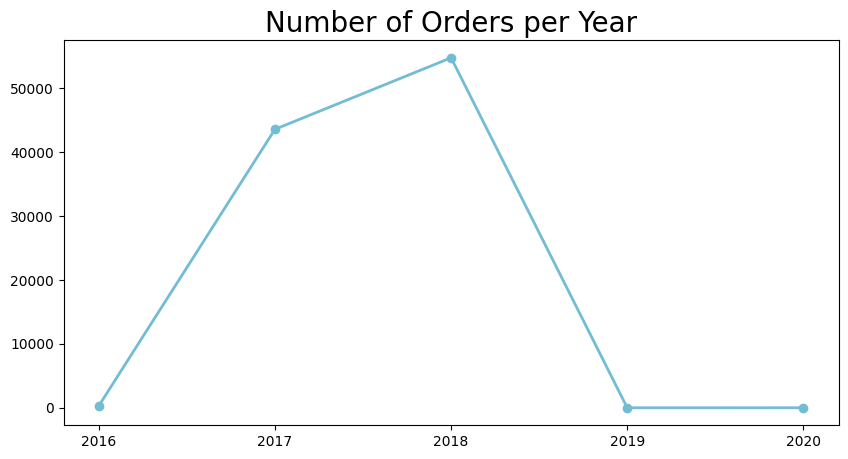

In [ ]:
monthly_orders_df = all_df.resample(rule='Y', on='order_date').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)


plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

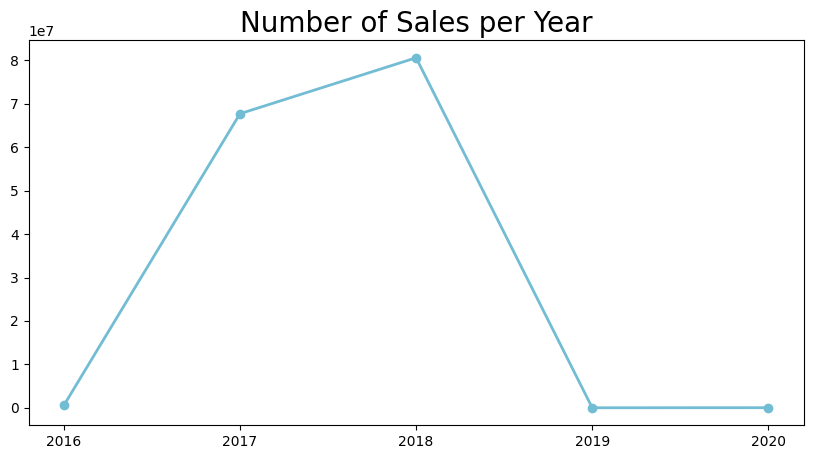

In [ ]:
monthly_orders_df = all_df.resample(rule='Y', on='order_date').agg({"product_weight": "sum"})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y')

monthly_orders_df = monthly_orders_df.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["product_weight"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Sales per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

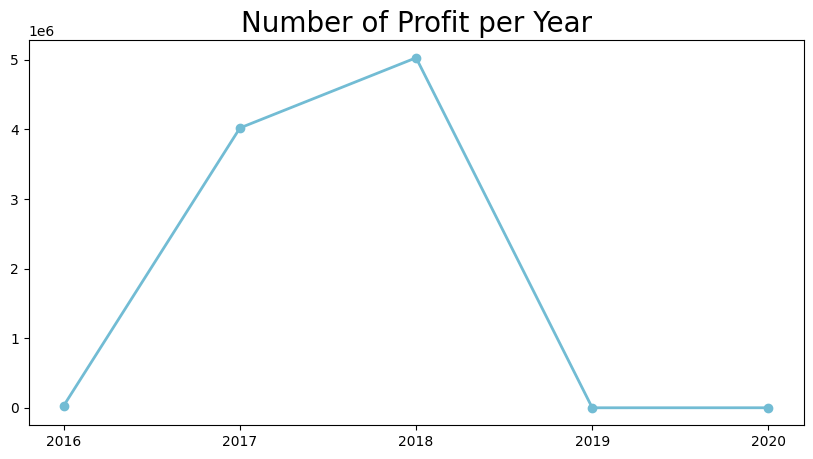

In [ ]:
monthly_orders_df = all_df.resample(rule='Y', on='order_date').agg({"profit": "sum"})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["profit"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Profit per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan hasil analisa yang ditunjukkan 3 line chart diatas, kita dapat menyimpulkan bahwa pada 3 tahun pertama, pertumbuhan penjualan perusahaan sangat signfikan. Titik pucah penjualan perusahaan berada pada tahun 2018 dengan total orderan sebanyak 54,771 orderan, total penjualan sebanyak 80,598,393.0 Kg dan total profit sebesar 5,028,700.30 US Dollar. Namun pada tahun 2019 terjadi penurunan yang sangat signifikan dimana pada tahun 2019 perusahaan tidak mampu menjual satupun produk, hal ini berlanjut hingga tahun 2020, dimana perusahaan hanya mampu melakukan 3 kali penjualan(orderan) dengan berat produk yang dijual sebesar 16,600 Kg dan menghasil profit sebesar 250.09 US Dollar per April 2020.

#####Conclusion pertanyaan 2

In [ ]:
sum_order_items_df = all_df.groupby("product_name").product_weight.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(5)

,product_name,product_weight
0,cama_mesa_banho,17716796.0
1,moveis_decoracao,14805268.0
2,utilidades_domesticas,13215813.0
3,esporte_lazer,10922755.0
4,ferramentas_jardim,8783233.0


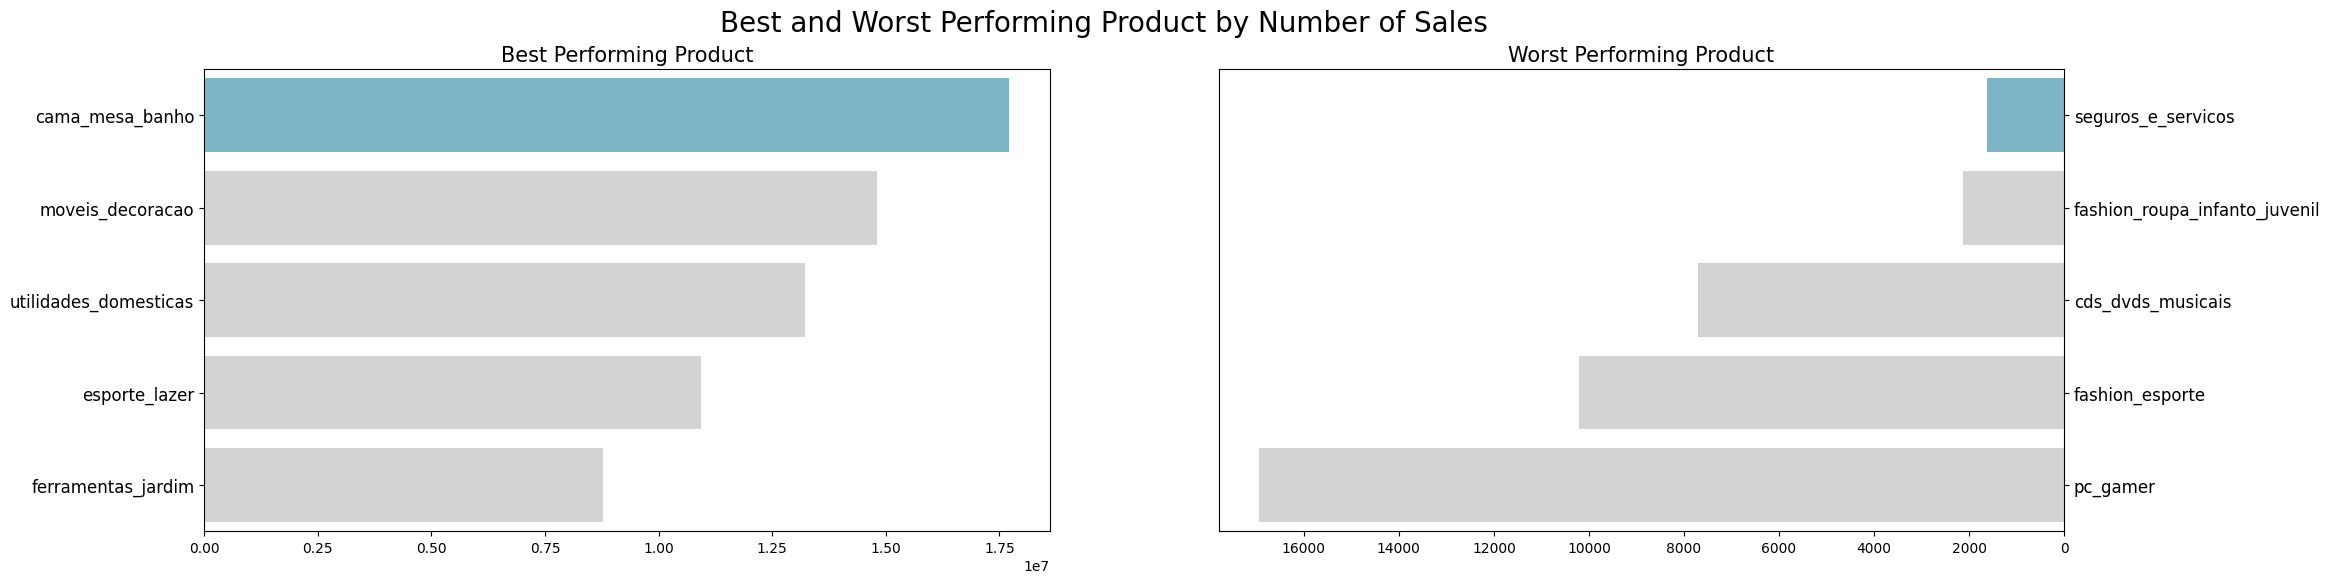

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_weight", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="product_weight", y="product_name", data=sum_order_items_df.sort_values(by="product_weight", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

Berdasarkan hasil analisa yang ditunjukkan Bar Plot diatas, dapat disimpulkan cama_mesa_banho menjadi produk dengan penjualan terbanyak dengan total 17,716,796.00 Kg untuk periode penjualan 5 tahun terakhir.

Sedangkan untuk produk dengan penjualan terendah adalah seguros_e_servicos dengan total penjualan sebesar 1,625.00 Kg untuk periode penjualan 5 tahun terakhir.

#####Conclusion pertanyaan 3

In [ ]:
revenue_order_items_df = all_df.groupby("product_name").price.sum().sort_values(ascending=False).reset_index()
revenue_order_items_df.head(5)

,product_name,price
0,cama_mesa_banho,1000342.80
1,beleza_saude,998586.52
2,relogios_presentes,854412.53
3,esporte_lazer,851779.40
4,informatica_acessorios,780642.60


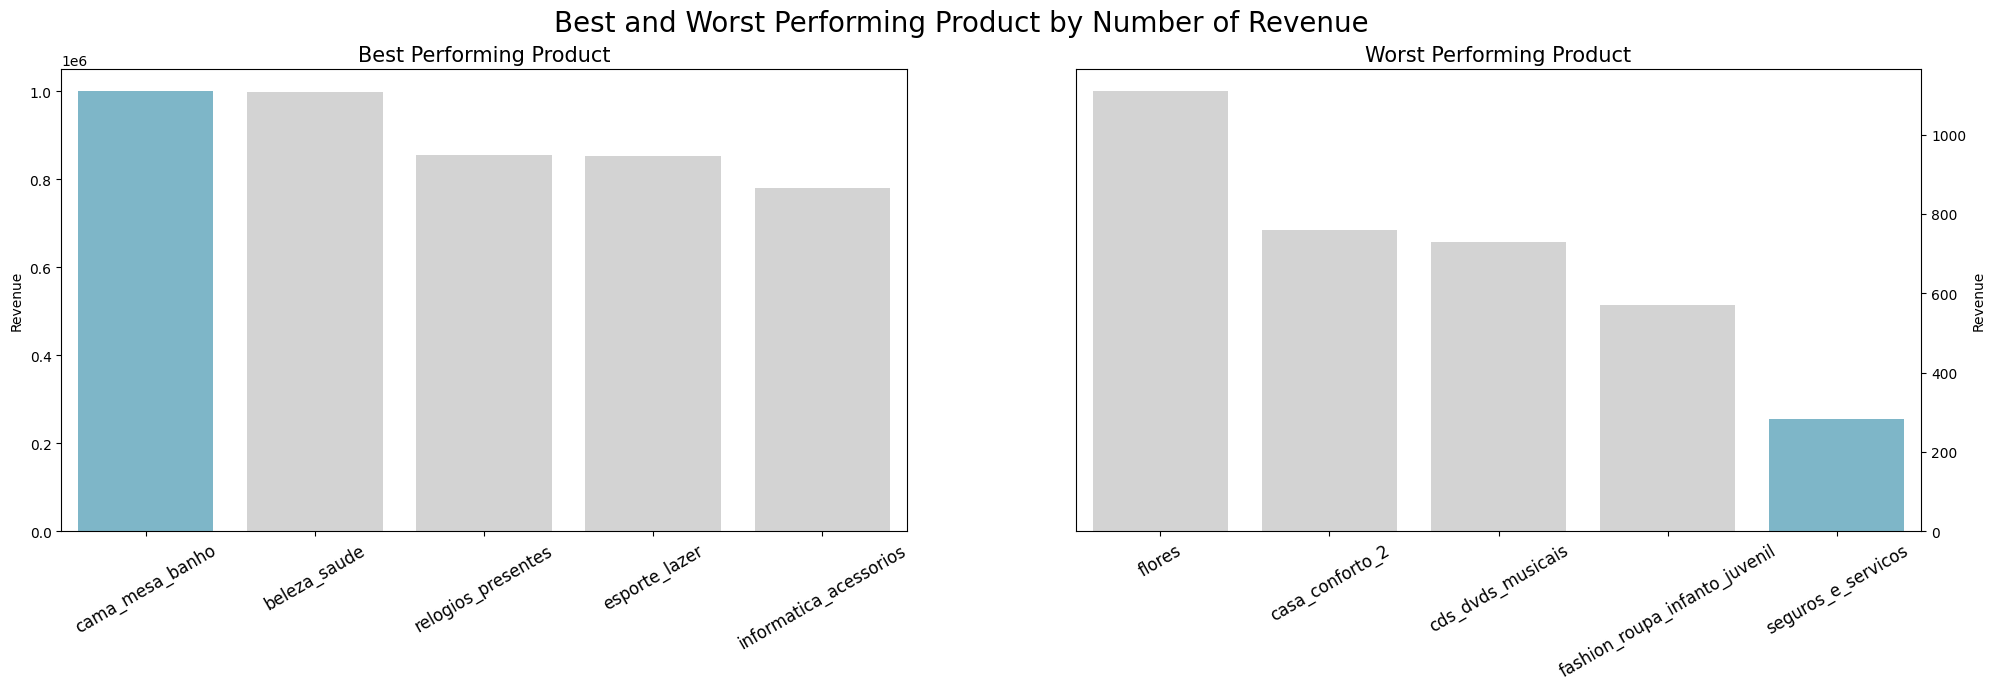

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_name", y="price", data=revenue_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel('Revenue')
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=12, rotation=30)

sns.barplot(x="product_name", y="price", data=revenue_order_items_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel('Revenue')
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12, rotation=30)

plt.suptitle("Best and Worst Performing Product by Number of Revenue", fontsize=20)
plt.show()

Revenue merupakan pendapatan yang didapatkan oleh perusahaan dari hasil penjualan suatu produk/ barang. Berdasarkan hasil analisa yang ditunjukkan Bar Plot diatas, dapat disimpulkan bahwa cama_mesa_banho menjadi produk dengan revenue terbesar dengan total 1,000,342.80 US Dollar untuk periode penjualan 5 tahun terakhir.

Sedangkan untuk produk dengan revenue terendah adalah seguros_e_servicos dengan total revenue sebesar 283.29 US Dollar untuk periode penjualan 5 tahun terakhir.

#####Conclusion pertanyaan 4

In [ ]:
profit_order_items_df = all_df.groupby("product_name").profit.sum().sort_values(ascending=False).reset_index()
profit_order_items_df.head(5)

,product_name,profit
0,beleza_saude,834625.900
1,cama_mesa_banho,806543.485
2,relogios_presentes,757633.990
3,esporte_lazer,698858.465
4,informatica_acessorios,643529.085


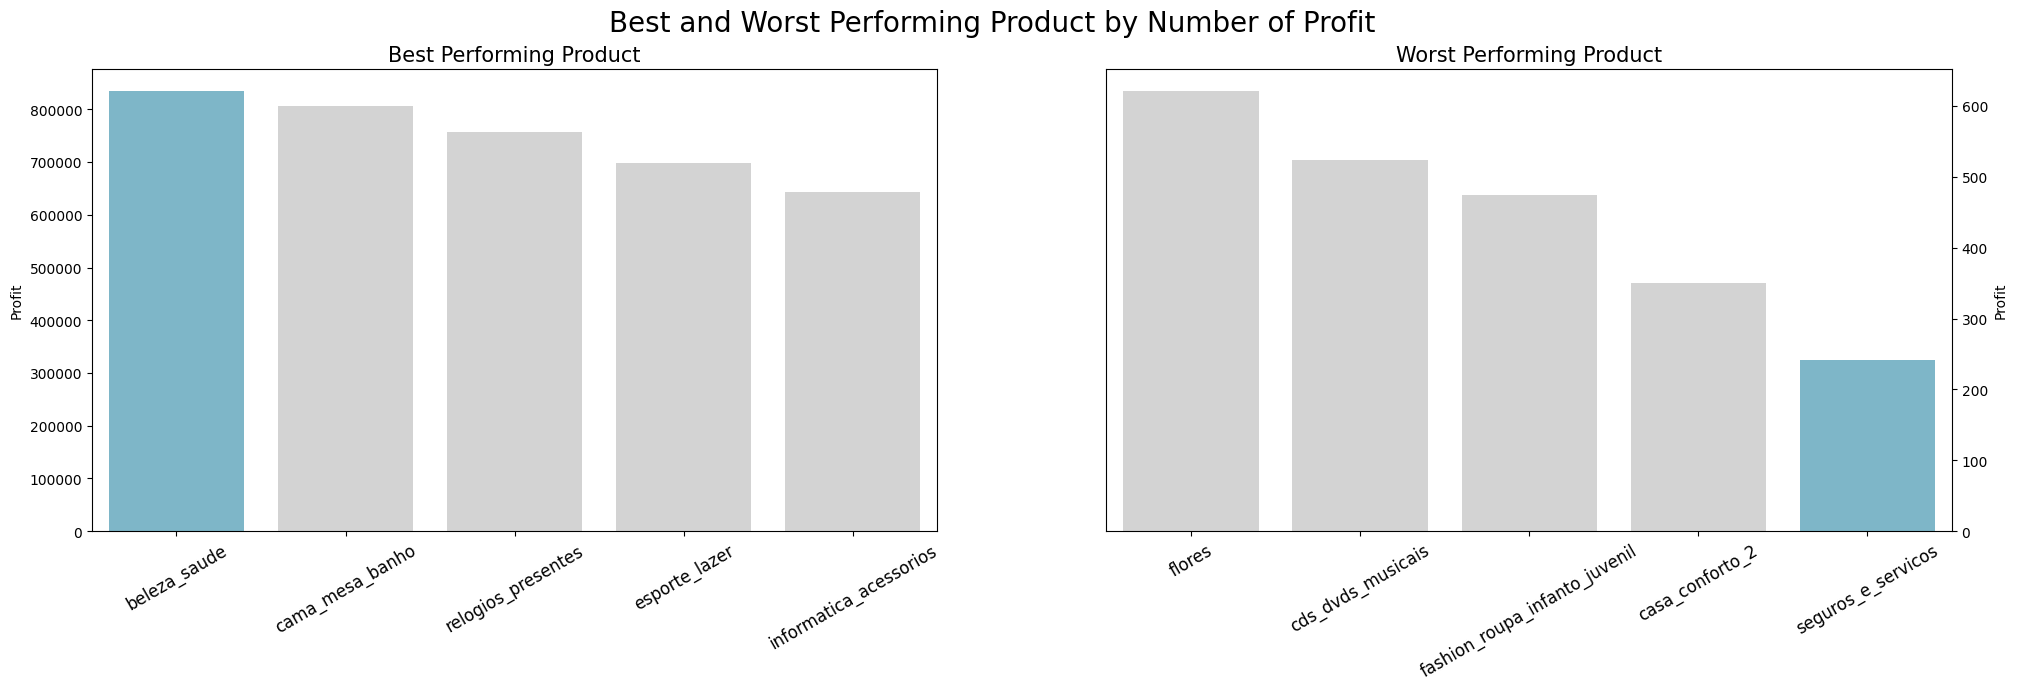

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_name", y="profit", data=profit_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel('Profit')
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=12, rotation=30)

sns.barplot(x="product_name", y="profit", data=profit_order_items_df.sort_values(by="profit", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel('Profit')
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12, rotation=30)

plt.suptitle("Best and Worst Performing Product by Number of Profit", fontsize=20)
plt.show()

Profit merupakan pendapatan yang didapatkan oleh perusahaan dengan cara mengurangkan revenue dengan freight_value, nilai profit akan selalu lebih kecil dibandingkan dengan nilai revenue karena nilai tersebut dikurangi freight_value sebagai biaya. Berdasarkan hasil analisa yang ditunjukkan Bar Plot diatas, dapat disimpulkan bahwa beleza_saude menjadi produk dengan revenue terbesar dengan total 834,625.90 US Dollar untuk periode penjualan 5 tahun terakhir. Jika pada revenue nilai cama_mesa_banho lebih besar dibandingkan beleza_saude, maka pada profit justru beleza_saude lebih besar dibandingkan cama_mesa_banho, hal ini menunjukkan cama_mesa_banho memiliki nilai freight_value lebih besar dibandingkan beleza_saude sehingga profit yang diterima perusahaan menjadi  lebih kecil.

Sedangkan untuk produk dengan profit terendah adalah seguros_e_servicos dengan total revenue sebesar 242.07 US Dollar untuk periode penjualan 5 tahun terakhir.

#####Conclusion pertanyaan 5

In [ ]:
all_df.head()

,order_id,order_item_id,product_id,seller_id,order_date,price,freight_value,product_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight,product_length_cm,product_height_cm,product_width_cm,profit
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,45.61
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,4300.0,50.0,30.0,40.0,219.97
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,181.13
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,0.20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,181.76


In [ ]:
rfm_df = all_df.groupby(by="product_name", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "profit": "sum" # menghitung jumlah profit yang dihasilkan
})
rfm_df.columns = ["product_name", "max_order_timestamp", "frequency", "monetary"]
 # menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,product_name,frequency,monetary,recency
0,agro_industria_e_comercio,182,31646.050,589
1,alimentos,450,22223.210,587
2,alimentos_bebidas,227,10002.415,589
3,artes,202,14249.505,581
4,artes_e_artesanato,23,1467.255,589


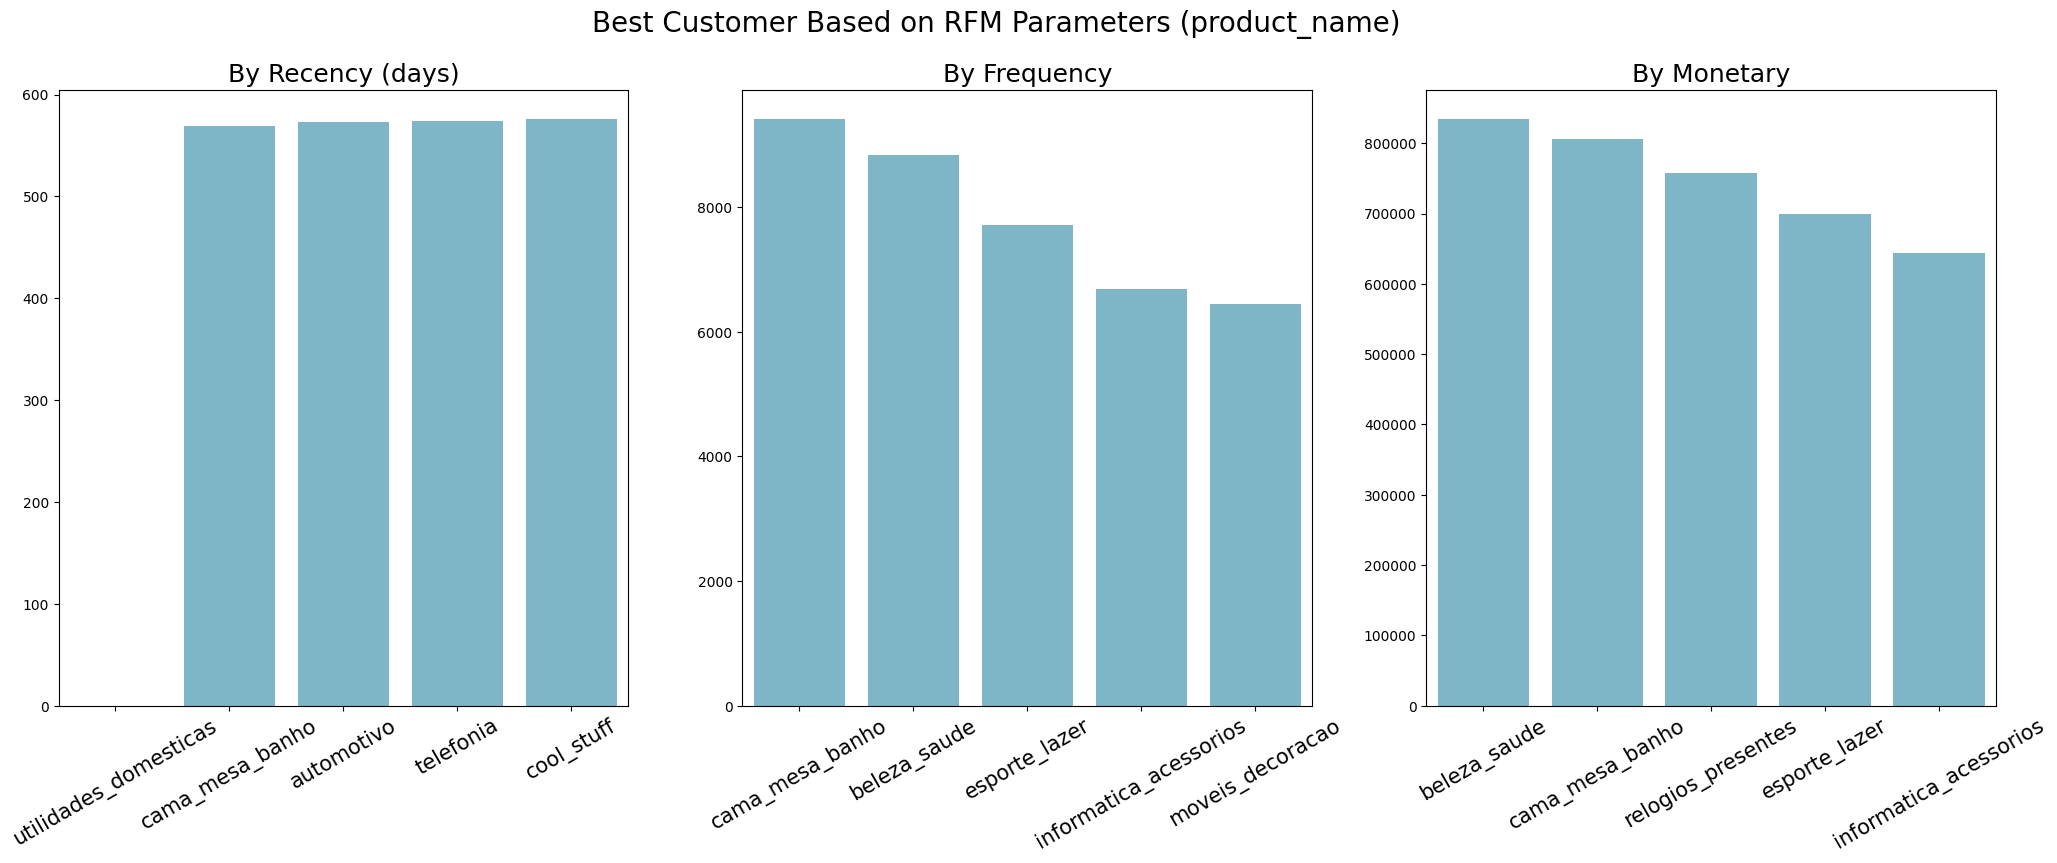

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="product_name", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15,rotation =30)

sns.barplot(y="frequency", x="product_name", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15,rotation =30)

sns.barplot(y="monetary", x="product_name", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15,rotation =30)

plt.suptitle("Best Customer Based on RFM Parameters (product_name)", fontsize=20)
plt.show()

Berdasarkan analisa menggunakan metode RFM yang ditunjukkan bar plot diatas, kita dapat membuat kesimpulan sebagai berikut :
- utilidades_domesticas, cama_mesa_banho, automotivo, telefonia & cool_stuff merupakan 5 produk terakhir yang diorder oleh consumen.
- cama_mesa_banho, beleza_saude, esporte_lazer, informatica_acessorios & moveis_decoracao adalah produk yang paling banyak terjual dalam periode penjualan 5 tahun terakhir.
- beleza_saude, cama_mesa_banho, relogios_presentes, esporte_lazer & informatica_acessorios merupakan produk yang memberikan profit terbesar ke perusahaan dalam periode penjualan 5 tahun terakhir.